Plot the impact of neutrino mass on the powerspectrum multipoles $P_\ell(k)$ at redshift $z=0$. Reproduce a noisier version of Villaescusa et al. (2017) Figure 6. 

In [1]:
import numpy as np
import nbodykit.lab as NBlab

In [2]:
import env
import data as Data 
import forwardmodel as FModel

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [4]:
def RSDHalos(mneut, i): 
    # given neutrino mass read in halo catalog, then redshift space distort it
    hcat = Data.NeutHalos(mneut, i, 4)
    hcat['RSDPosition'] = FModel.RSD(hcat, LOS=[0,0,1])
    return hcat

In [5]:
plks = {}
for mneut in [0.0, 0.06, 0.1, 0.15, 0.6, 0.9]: 
    halo_i = RSDHalos(mneut, 1)
    plk_i = FModel.Observables(halo_i, rsd=True)
    plks[mneut] = plk_i

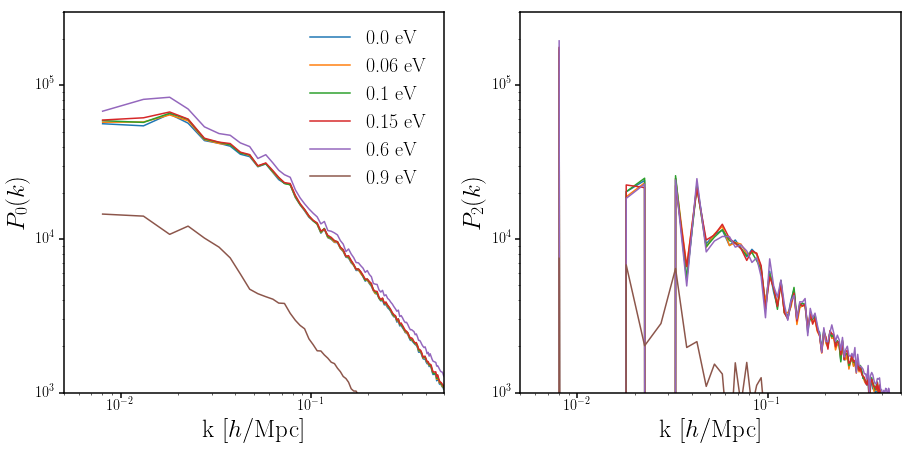

In [6]:
fig = plt.figure(figsize=(15,7))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
for mneut in [0.0, 0.06, 0.1, 0.15, 0.6, 0.9]: 
    plk_i = plks[mneut]
    sub1.plot(plk_i['k'], plk_i['p0k'], label=str(mneut)+' eV')
    sub2.plot(plk_i['k'], plk_i['p2k'])
sub1.legend(loc='upper right', prop={'size': 20})
# x-axes
sub1.set_xlabel('k [$h/\mathrm{Mpc}$]', fontsize=25)
sub1.set_xlim([0.005, 0.5])
sub1.set_xscale('log')
sub2.set_xlabel('k [$h/\mathrm{Mpc}$]', fontsize=25)
sub2.set_xlim([0.005, 0.5])
sub2.set_xscale('log')
# y-axis
sub1.set_ylabel('$P_0(k)$', fontsize=25)
sub1.set_ylim([1e3,3e5])
sub1.set_yscale('log')
sub2.set_ylabel('$P_2(k)$', fontsize=25)
sub2.set_ylim([1e3,3e5])
sub2.set_yscale('log')

(0.95, 1.2)

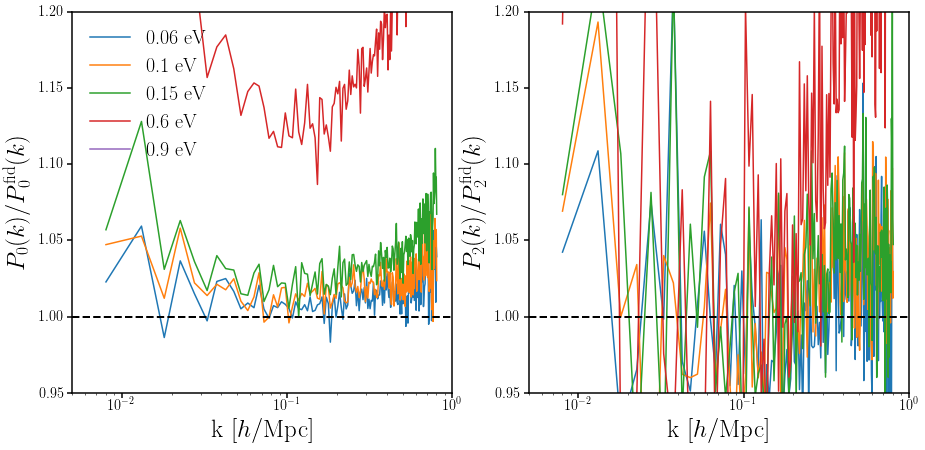

In [9]:
fig = plt.figure(figsize=(15,7))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
for mneut in [0.0, 0.06, 0.1, 0.15, 0.6, 0.9]: 
    plk_i = plks[mneut]
    if mneut == 0.0: 
        p0k_fid = plk_i['p0k']
        p2k_fid = plk_i['p2k']
    else: 
        sub1.plot(plk_i['k'], plk_i['p0k']/p0k_fid, label=str(mneut)+' eV')
        sub2.plot(plk_i['k'], plk_i['p2k']/p2k_fid)
sub1.plot([0.005, 1.], [1., 1.], c='k', ls='--', lw=2)
sub2.plot([0.005, 1.], [1., 1.], c='k', ls='--', lw=2)

sub1.legend(loc='upper left', prop={'size': 20})
# x-axes
sub1.set_xlabel('k [$h/\mathrm{Mpc}$]', fontsize=25)
sub1.set_xlim([0.005, 1])
sub1.set_xscale('log')
sub2.set_xlabel('k [$h/\mathrm{Mpc}$]', fontsize=25)
sub2.set_xlim([0.005, 1])
sub2.set_xscale('log')
# y-axis
sub1.set_ylabel('$P_0(k)/P_0^\mathrm{fid}(k)$', fontsize=25)
sub1.set_ylim([0.95, 1.2])
sub2.set_ylabel('$P_2(k)/P_2^\mathrm{fid}(k)$', fontsize=25)
sub2.set_ylim([0.95, 1.2])